# Assessment 3 - Online Shoppers Purchasing Intention
#### Objective: 

In [39]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             roc_curve, accuracy_score, precision_score, recall_score, 
                             f1_score, matthews_corrcoef, silhouette_score, davies_bouldin_score)

# dimensionality reduction
from sklearn.decomposition import PCA

# clustering
from sklearn.cluster import KMeans, DBSCAN

# data preprocessing
from sklearn.preprocessing import MinMaxScaler

# handling imbalanced data
from imblearn.over_sampling import SMOTE

# displaying outputs in jupyter
from IPython.display import display

from sklearn.mixture import GaussianMixture

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from joblib import Parallel, delayed


utility functions

In [10]:
def plotbox_and_hist(df, columns, figsize=(30, 80)):
    fig, axes = plt.subplots(len(columns), 2, figsize=figsize)

    for i, column in enumerate(columns):
        sns.boxplot(x=df[column], ax=axes[i, 0])
        sns.histplot(x=df[column], ax=axes[i, 1])

    plt.tight_layout()
    plt.show()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def countplot_value(df, columns, figsize=(20, 30)):
    # Compute the number of rows and columns for subplots
    num_columns = 2
    num_rows = (len(columns) + 1) // num_columns  # Ensures proper grid size for odd numbers
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, column in enumerate(columns):
        ax = axes[i]
        sns.countplot(x=df[column], ax=ax)
        
        # Annotate bar heights
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 5), textcoords='offset points')
        ax.set_title(f'{column} Counts')

    # Remove any unused subplot axes
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

## 1. Retrieving and Preparing the Data

### 1.1. Data Loading

In [13]:
# load the dataset
file_path = 'online_shoppers_intention.csv'
df = pd.read_csv(file_path)

### 1.2. Dataset Observation

In [14]:
# display the first 5 rows of the dataset
display(df.head())

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [15]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [16]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

##### Analysis
The dataset contains 12,330 rows and 18 columns. There are no missing values across any of the columns, as all 18 attributes have 12,330 non-null entries.

The data types are primarily integers and floats, with a few categorical variables (object types) like **Month** and **VisitorType**, as well as Boolean variables like **Weekend** and **Revenue**. The attributes can be categorized as follows:

- Categorical values: **Month**, **VisitorType**.
- Numerical values:
  - Discrete: **Administrative**, **Informational**, **ProductRelated**, **OperatingSystems**, **Browser**, **Region**, **TrafficType**.
  - Continuous: **Administrative_Duration**, **Informational_Duration**, **ProductRelated_Duration**, **BounceRates**, **ExitRates**, **PageValues**, **SpecialDay**.
  
The **Revenue** column is a binary variable indicating whether a transaction resulted in revenue. The **Weekend** column is also Boolean, representing whether the visit occurred on the weekend.
Further analysis can be conducted to explore relationships between these variables, especially the conversion-related columns like **Revenue**.

### 1.3. Detailed Analysis and Cleaning

In [17]:
# create a copy of the dataframe to store the cleaned data
df_clean = df.copy()

In [18]:
# display the unique values of the 'Month' and 'VisitorType' columns
print(df_clean['Month'].unique())
print(df_clean['VisitorType'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
['Returning_Visitor' 'New_Visitor' 'Other']


In [19]:
# fix typos in the 'Month' column
df_clean['Month'] = df_clean['Month'].replace({'June': 'Jun'})
# convert the 'Month' column to numerical values
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_clean['Month'] = df_clean['Month'].map(month_map)
df_clean = df_clean.sort_values('Month')
# verify the changes
print(df_clean['Month'].unique())

[ 2  3  5  6  7  8  9 10 11 12]


In [20]:
# convert the 'Month' and 'Revenue' columns to numerical
bool_columns = ['Weekend', 'Revenue']
df_clean[bool_columns] = df_clean[bool_columns].astype(int)

In [21]:
# verify the conversion
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12330 entries, 0 to 12303
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType              12

#### 1.3.1. Univariate Analysis of Numerical values

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_clean['VisitorType'] = encoder.fit_transform(df_clean['VisitorType'])
print(df_clean['VisitorType'])

0        2
1        2
2        2
3        2
4        2
        ..
12319    2
12318    2
12317    0
12304    2
12303    2
Name: VisitorType, Length: 12330, dtype: int64


In [23]:
columns = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration",
           "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues",
           "SpecialDay"]

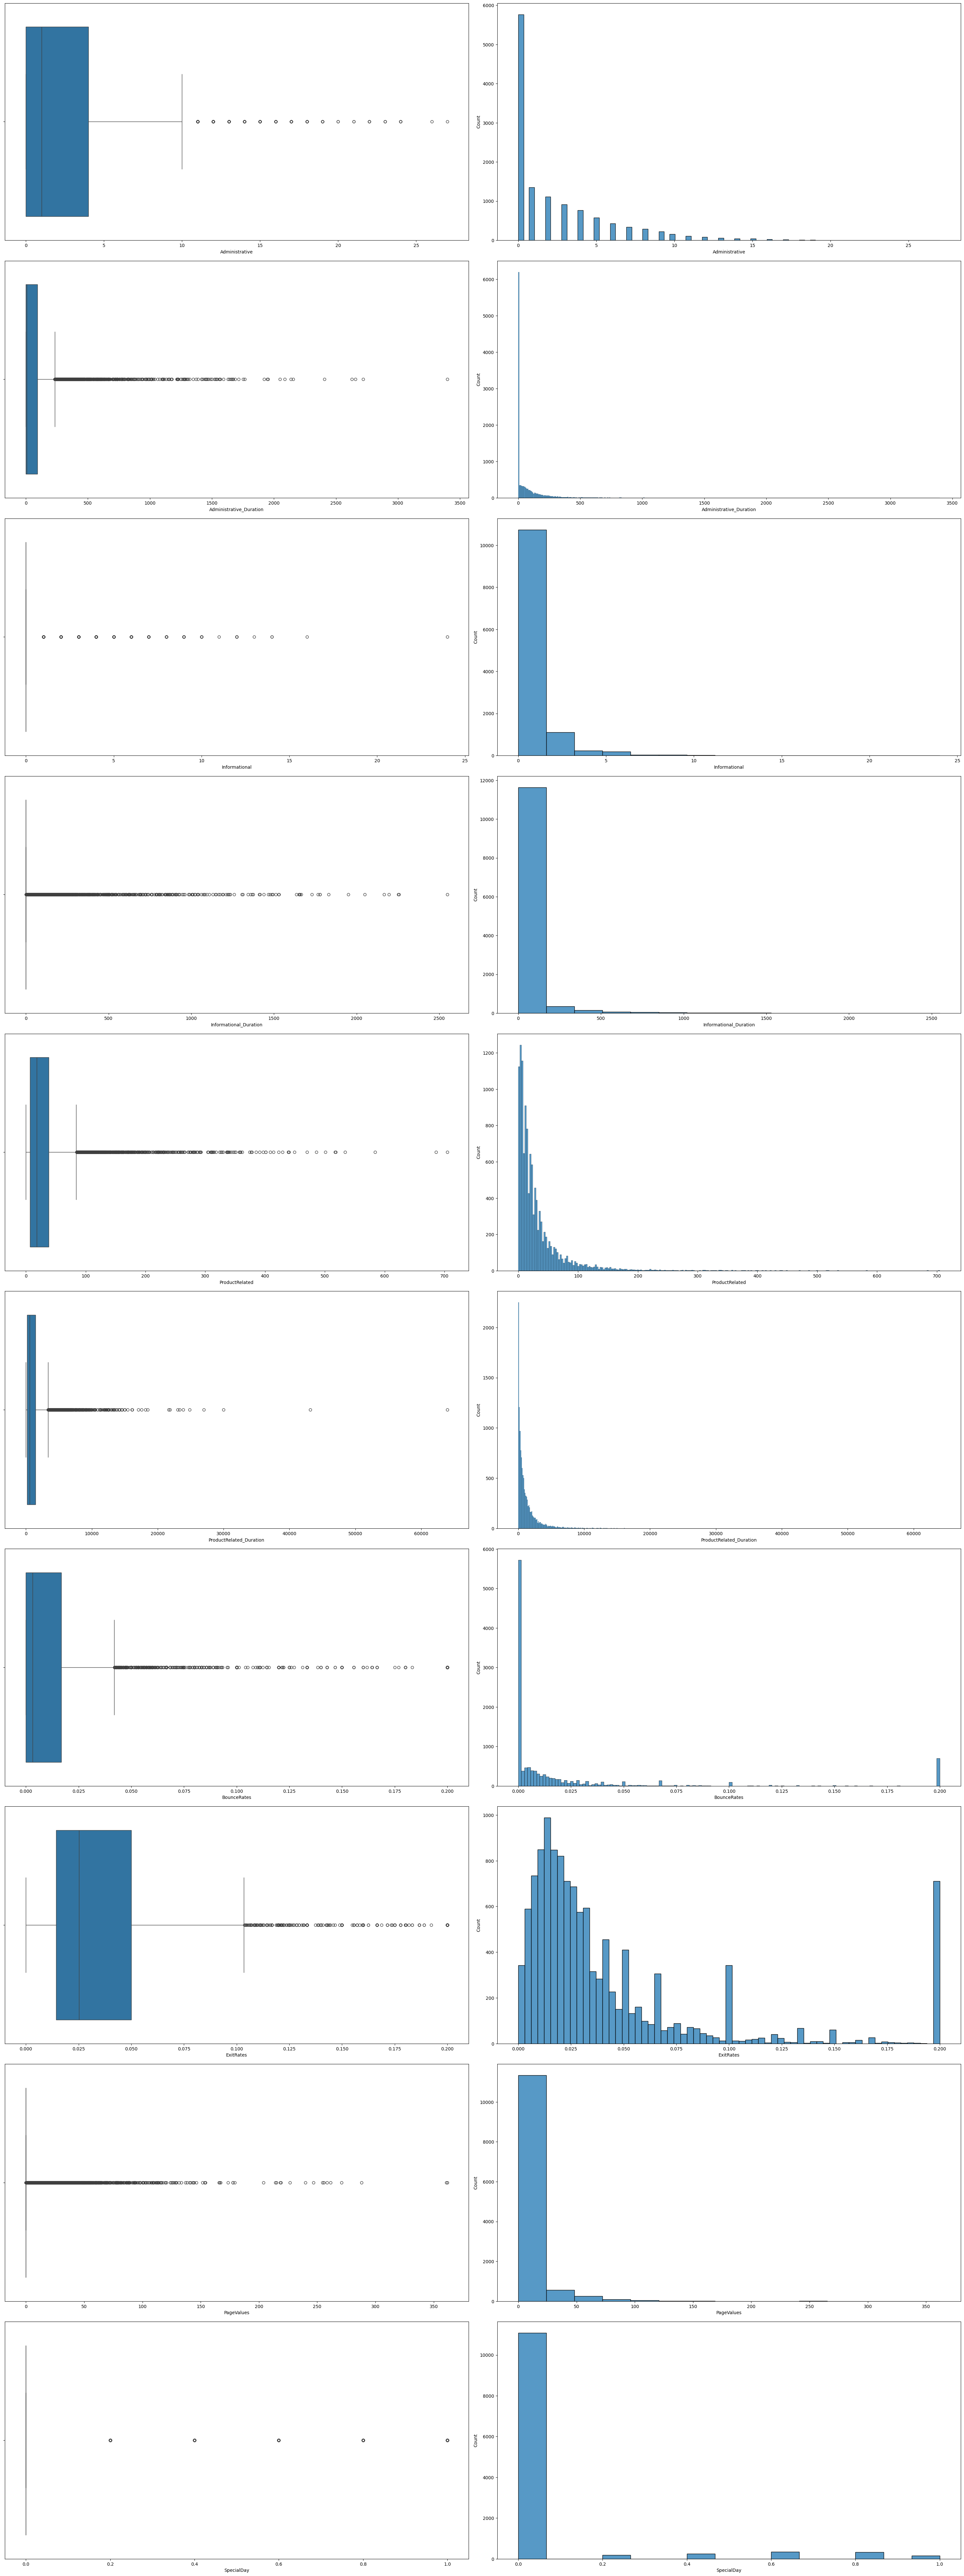

In [24]:
plotbox_and_hist(df_clean, columns)

##### Analysis
- Histograms: Most features are right-skewed, with values concentrated on the lower end and long tails extending to higher values. Features like **Administrative** and **Administrative_Duration** show that most sessions involve minimal administrative activities, with outliers at higher values. **Informational** and **Informational_Duration** follow a similar pattern, suggesting that informational activities are not common in most sessions. **ProductRelated** and **ProductRelated_Duration** have a broader spread compared to administrative and informational features. This indicates more varied user engagement with product-related pages, although there are still some significant outliers. **BounceRates** and **ExitRates** are mostly near zero, showing that users usually stay on the site instead of leaving immediately. **PageValues** is skewed with most values being zero, while a few sessions have high values, showing only a small number of sessions generate significant revenue. **SpecialDay** has specific peaks that correspond to certain predefined special days in the data.

- Boxplots: Many features have visible outliers, represented by points beyond the whiskers of the boxplot. **Administrative_Duration** and **Informational_Duration** show tight interquartile ranges (IQRs) with outliers at higher values, confirming that most sessions have minimal durations for these activities. **ProductRelated_Duration** has a wider IQR, reflecting more variability in user interactions with product pages, but also includes a few extreme outliers. **BounceRates** and **ExitRates** have very narrow IQRs, with most values near zero, but occasional outliers suggest some sessions have high rates. **PageValues** has a compact IQR but includes extreme outliers, reflecting rare but impactful sessions with high page values. **SpecialDay** does not show significant outliers since its values are predefined and specific.

Further analysis will help us decide whether to clean datapoints, apply data imputation, or drop the problematic columns.

#### 1.3.2. Univariate Analysis of Categorical values

In [25]:
columns = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Revenue"]

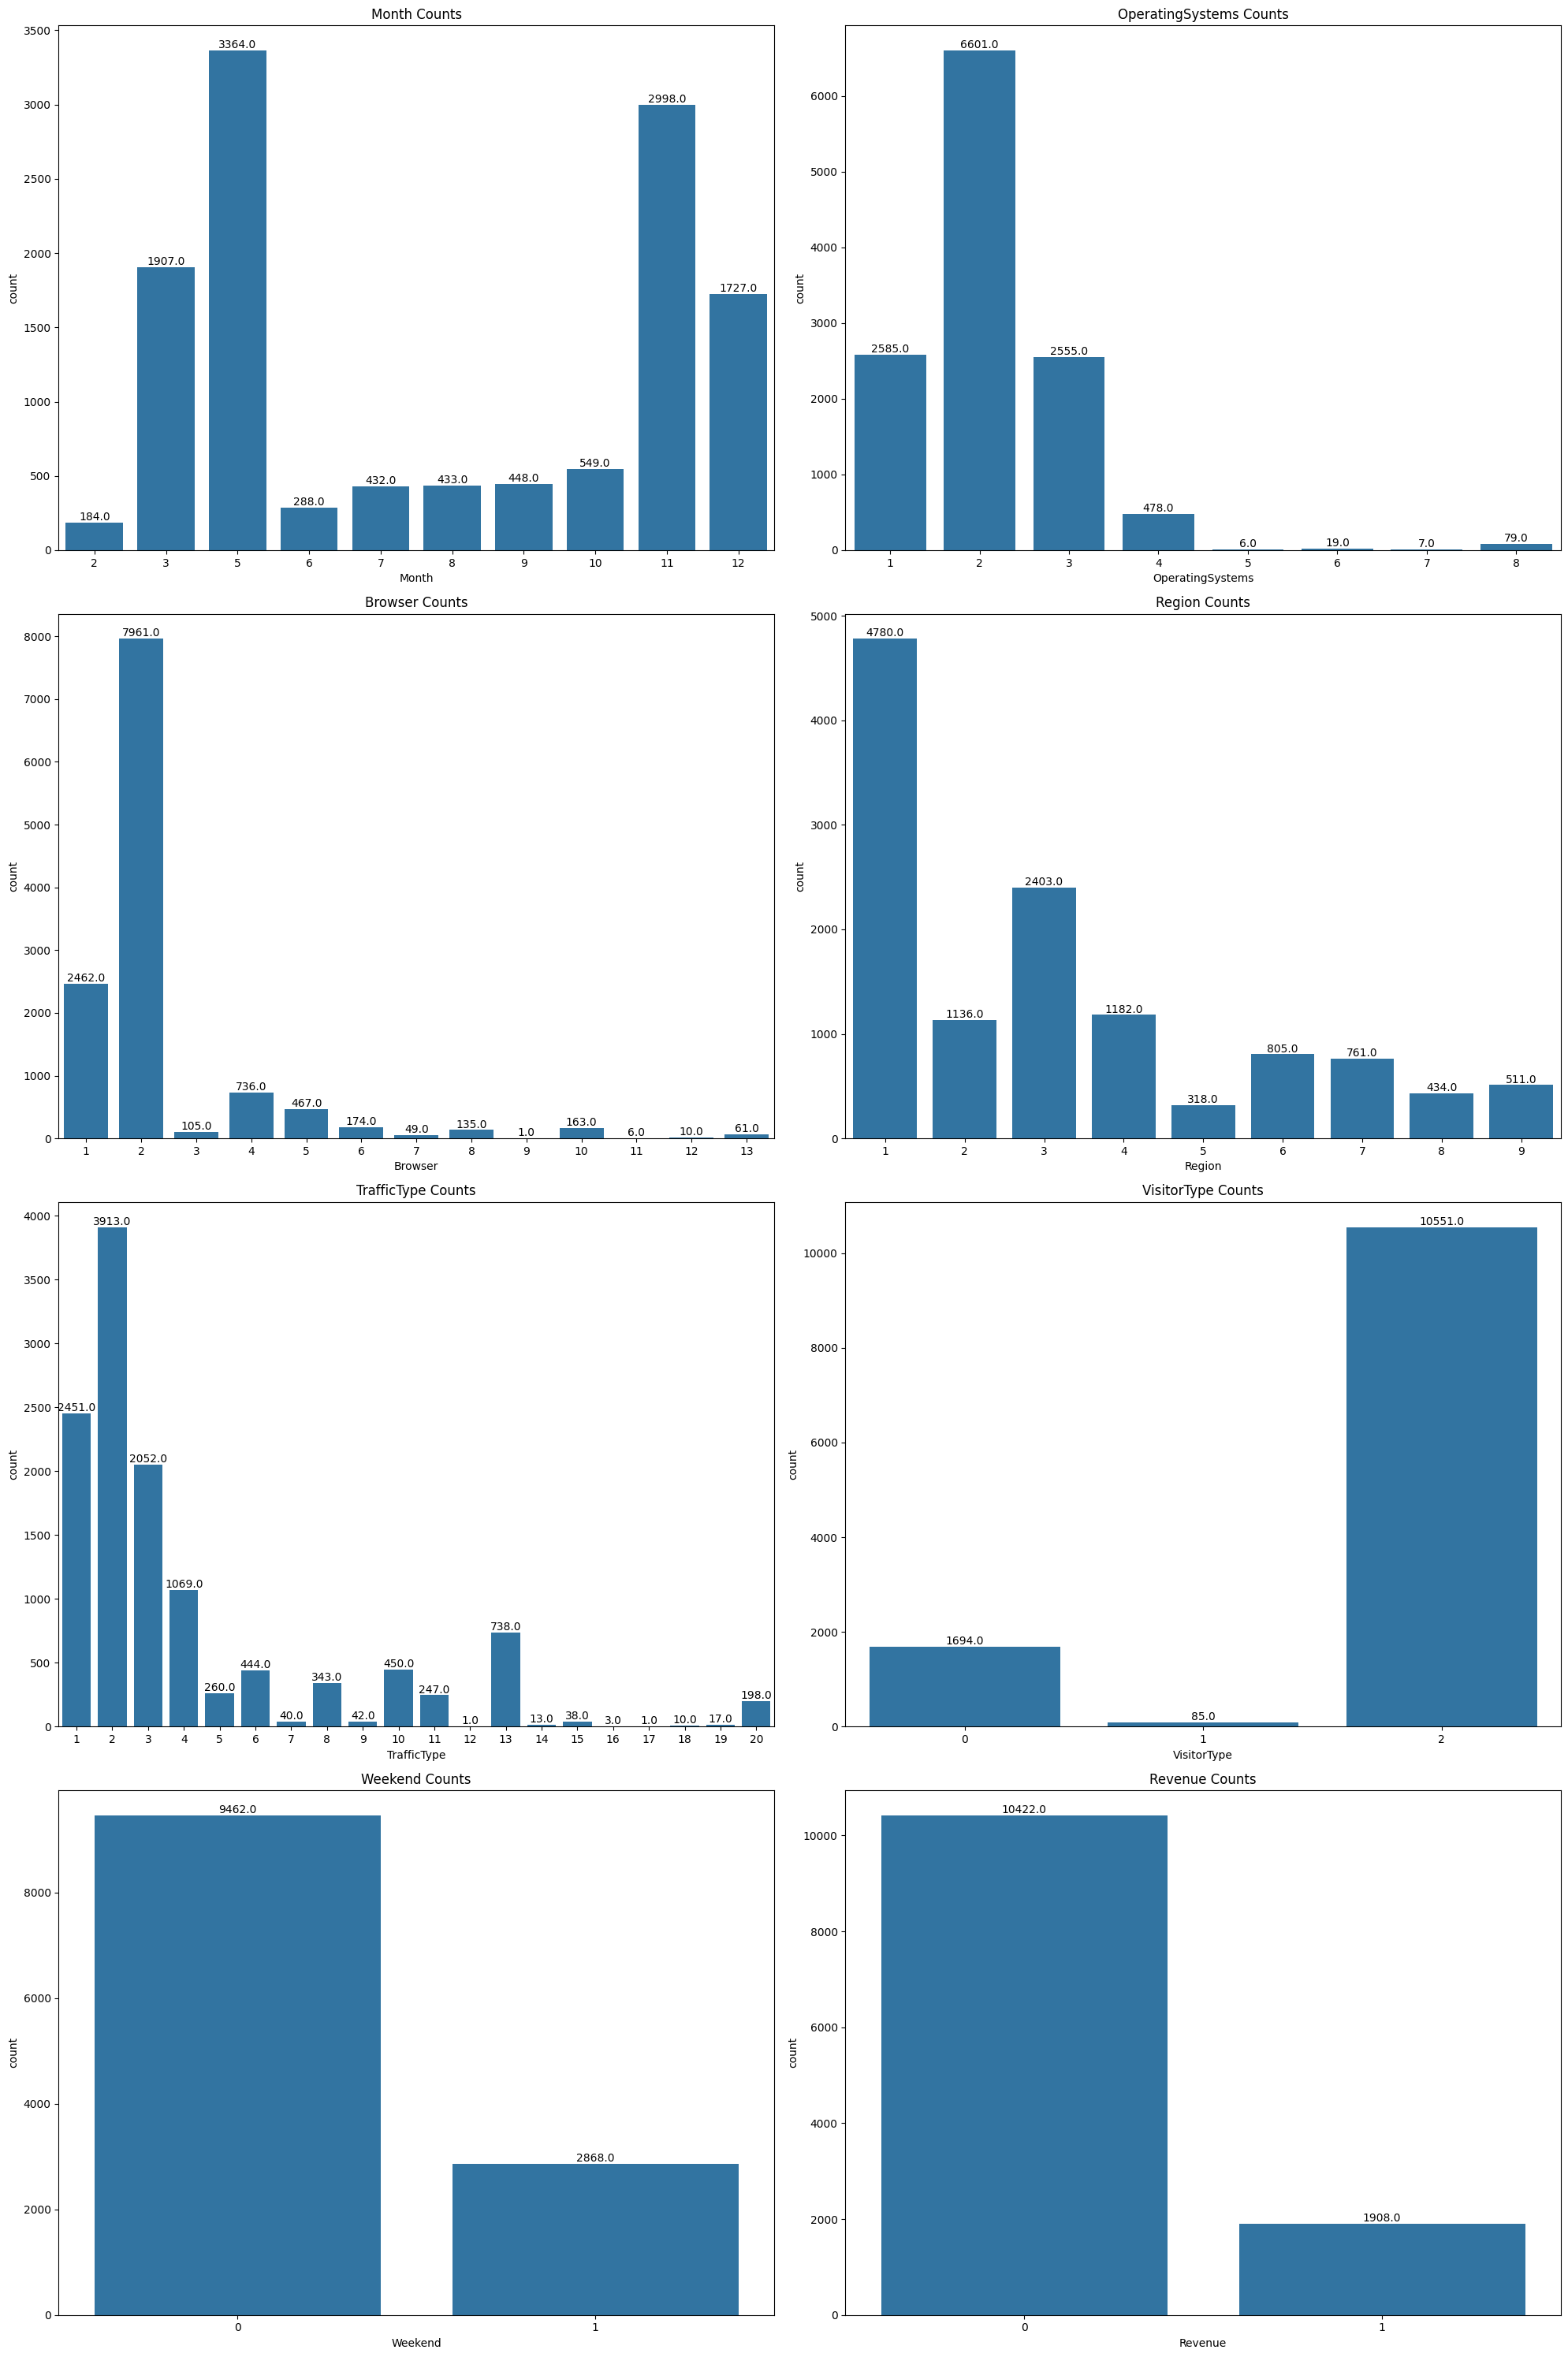

In [26]:
countplot_value(df_clean, columns)

##### Analysis
There are heavy imbalances across all categorical variables, specifically:
- **Month**: March and November have the highest counts, while other months have significantly lower counts.
- **OperatingSystems**: Operating systems 1, 2, and 3 dominate the data, while other systems have lower counts.
- **Browser**: Browsers 1 and 2 have high counts, while other browsers show much lower counts.
- **Region**: Regions 1 and 2 represent most of the data, with other regions showing significantly lower counts.
- **TrafficType**: Traffic types 1 and 2 have higher counts, while other types are underrepresented.
- **VisitorType**: Returning visitors are the most common, while new visitors and the 'other' category are less frequent.
- **Weekend**: Non-weekend visits have the highest count, while weekend visits are much less frequent.
- **Revenue**: Non-revenue generating visits dominate, while revenue-generating visits are much fewer.

Overall, imbalances could adversely affect the accuracy of predictions or analyses. Data imputation techniques might be considered to address this issue.

#### 1.3.3. Multivariate Analysis

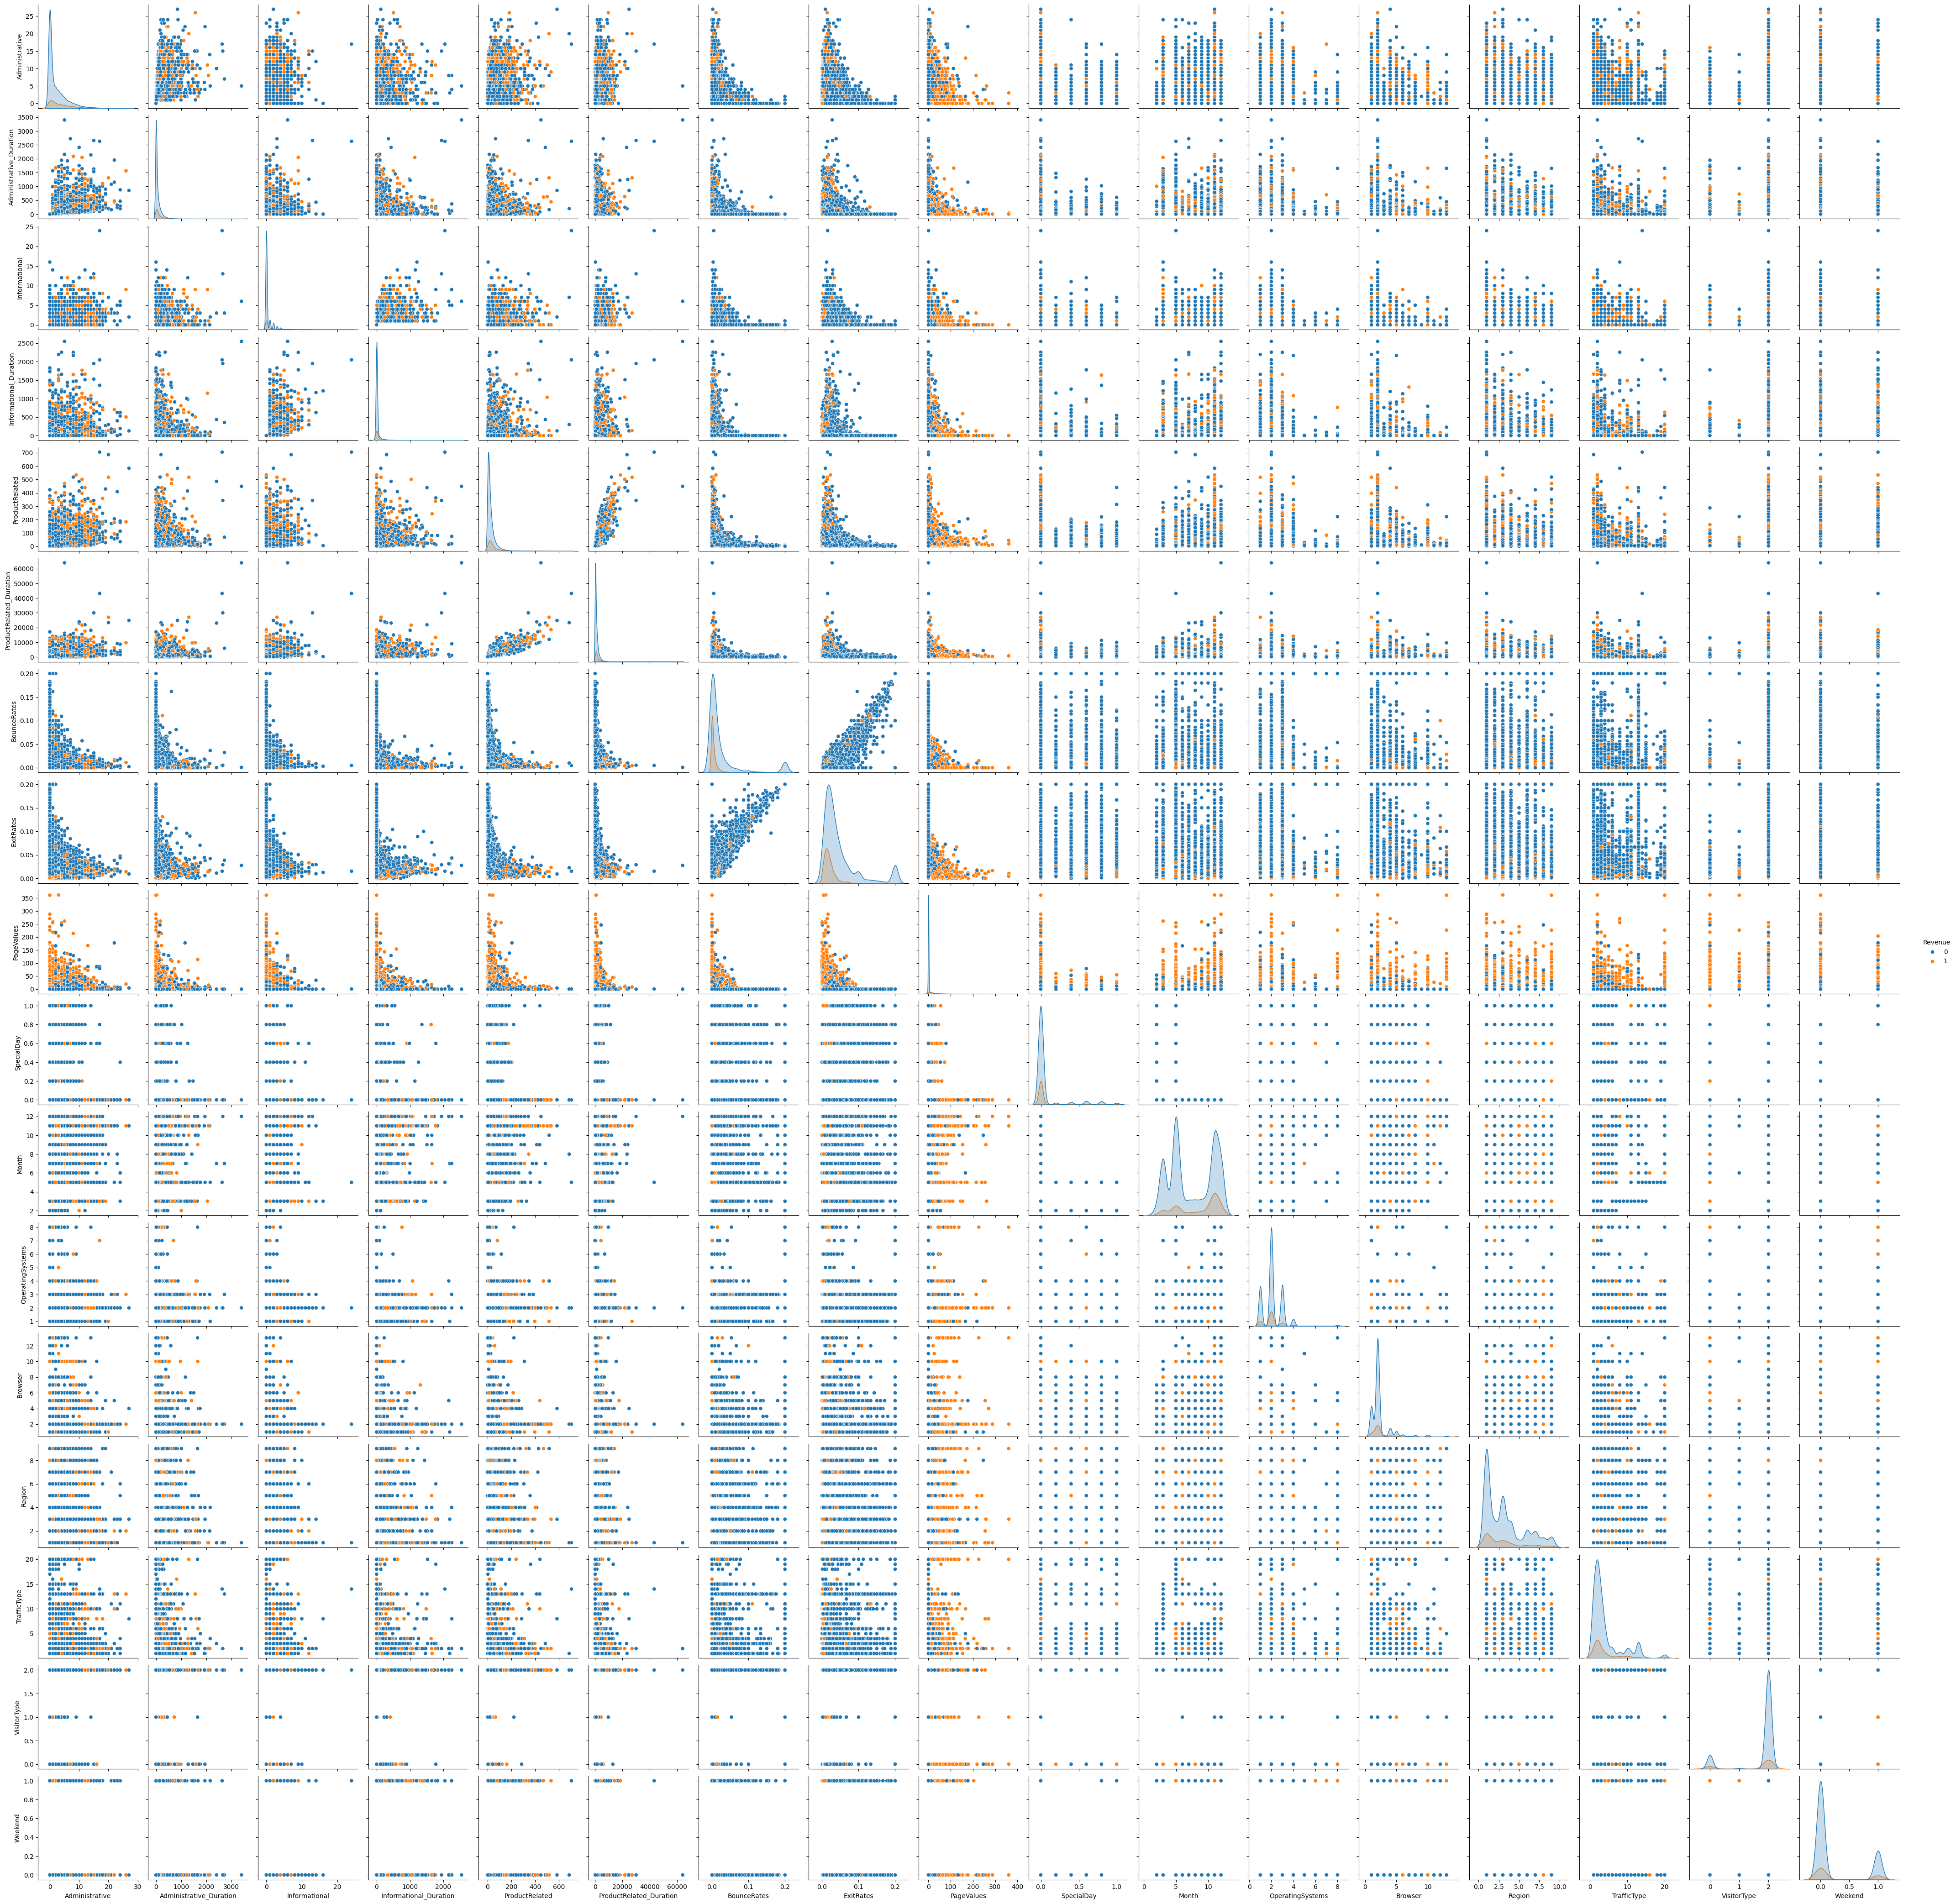

In [27]:
sns.pairplot(df_clean, hue="Revenue")

#### 1.3.4. Cleaning Data

In [28]:
# remove outliers with low frequencies
df_temp = df_clean.copy()
df_clean = df_clean[((df_clean['Administrative'] < 25) & 
                     (df_clean['Administrative_Duration'] < 2000) & 
                     (df_clean['Informational'] < 15) & 
                     (df_clean['Informational_Duration'] < 1750) & 
                     (df_clean['ProductRelated'] < 475) & 
                     (df_clean['ProductRelated_Duration'] < 30000) & 
                     (df_clean['BounceRates'] < 0.175) & 
                     (df_clean['ExitRates'] < 0.19) &
                     (df_clean['PageValues'] < 250))]

In [29]:
# verify removal
rows_remove = len(df_temp) - len(df_clean)
print(f"The numbers of rows removed: {rows_remove}")

The numbers of rows removed: 751


## 2. Feature Engineering

### 2.1. Preprocessing Features and Plotting Correlations

In [30]:
# since we do not have enough context to extract meaning from the values of categorical variables such as 'OperatingSystems', 'Browser', 'Region', and 'TrafficType', 
# we will drop these columns.
df_features = df.copy()
df_features = df_clean.drop(columns=["OperatingSystems", "Browser", "Region", "TrafficType"])

In [31]:
# apply one-hot encoding to 'VisitorType' and 'Month' and concatenate with the original DataFrame
df_features = pd.concat([df_features, pd.get_dummies(df_features["Month"], prefix='Month_')], axis=1)
df_features = pd.concat([df_features, pd.get_dummies(df_features["VisitorType"], prefix='VisitorType_')], axis=1)

In [32]:
# drop the original 'VisitorType' column
df_features.drop("Month", axis=1, inplace=True)
df_features.drop("VisitorType", axis=1, inplace=True)

In [33]:
# correlation analysis
target_df = df_features['Revenue']

In [34]:
all_corr = df_features.corr(method = 'pearson')

In [35]:
mask = np.zeros_like(all_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

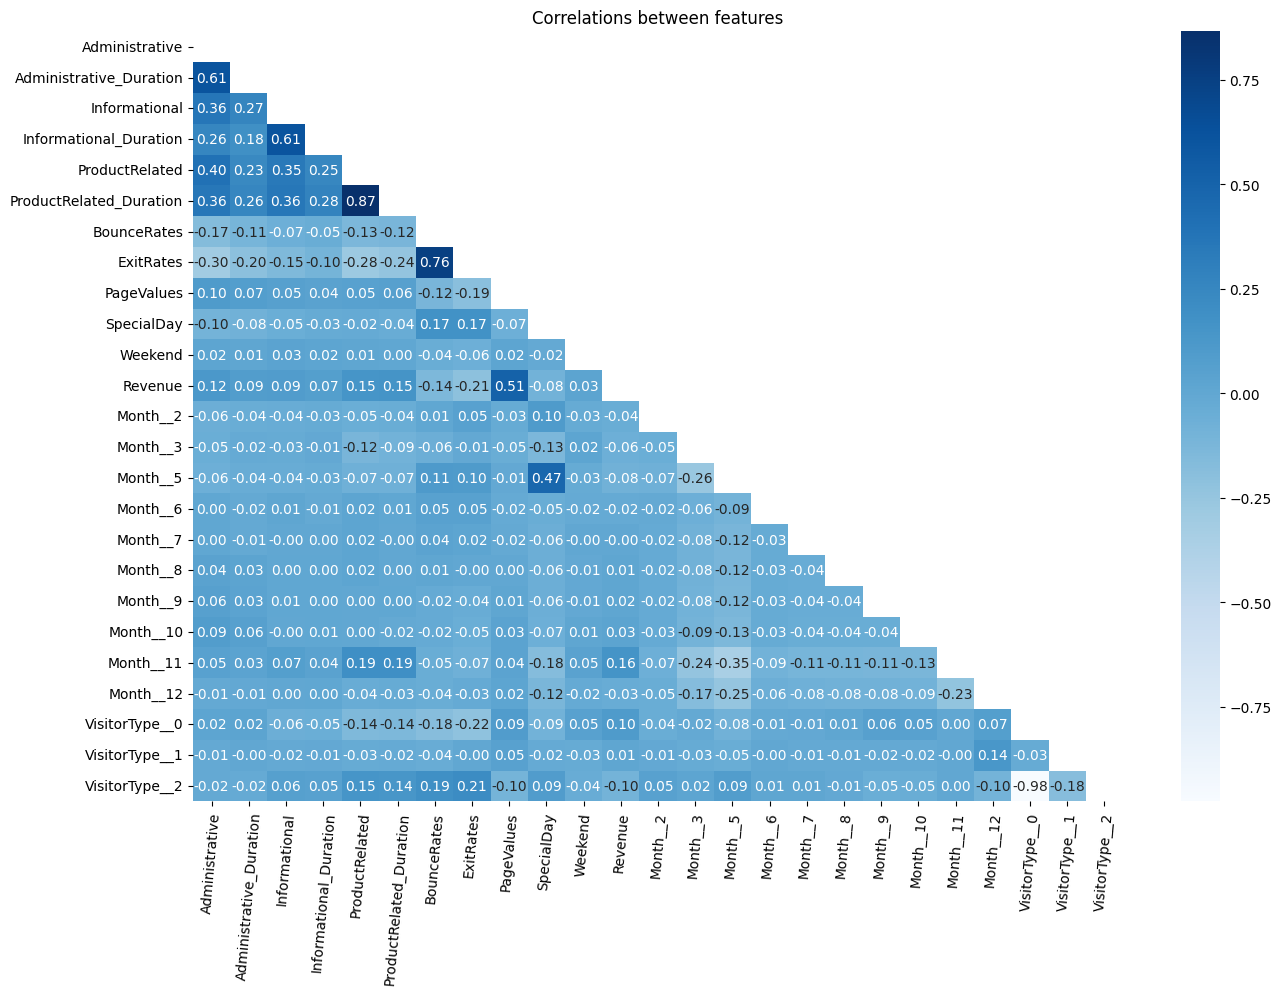

In [36]:
ax = plt.figure(figsize=(15, 10))
ax = sns.heatmap(all_corr, cmap='Blues', annot=True, fmt='.2f', mask = mask)
ax = plt.xticks(rotation=85)
ax = plt.title("Correlations between features")

## 3. Data Modelling

### 3.1. Regression

### 3.2. Clustering

In [37]:
# copy the cleaned dataframe
df_cluster = df_clean.copy()

# define model parameters
model_target = 'Revenue'
model_features = ['Administrative', 'Administrative_Duration', 'Informational', 
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# prepare the data
df_cluster = df_cluster[model_features]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df_cluster[model_features])
df_cluster[model_features] = scaled_features

# determine optimal number of pca components using explained variance ratio
pca_full = PCA()
pca_full.fit(df_cluster[model_features])
explained_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1  # keep 95% of variance

# apply pca with optimal components
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(df_cluster[model_features])

#### 3.2.1. Model 1: Gaussian Mixture Model (GMM) with Hyperparameter Tuning
Advantages:
- Can handle clusters of different shapes and sizes.
- Provides probabilistic cluster assignments.
- Can handle outliers by assigning them lower probabilities.

In [41]:
def fit_gmm(n_components, covariance_type, init_params, max_iter, pca_features):
    gmm = GaussianMixture(
        n_components=n_components,
        covariance_type=covariance_type,
        init_params=init_params,
        max_iter=max_iter,
        random_state=42
    )
    gmm.fit(pca_features)
    bic = gmm.bic(pca_features)
    return bic, gmm

best_bic = float('inf')
best_gmm_bic = None
best_n_components = None
best_covariance_type = None
best_init_params = None
best_max_iter = None

# define the grid of hyperparameters to search
param_grid = [(n_components, covariance_type, init_params, max_iter) 
              for n_components in range(2, 21)
              for covariance_type in ['full', 'tied', 'diag', 'spherical']
              for init_params in ['kmeans', 'random']
              for max_iter in [100, 200, 300]]

# use parallel processing for hyperparameter search
results = Parallel(n_jobs=-1)(
    delayed(fit_gmm)(n_components, covariance_type, init_params, max_iter, pca_features)
    for (n_components, covariance_type, init_params, max_iter) in param_grid
)

# extract best gmm based on bic
for bic, gmm in results:
    if bic < best_bic:
        best_bic = bic
        best_gmm_bic = gmm

# predict with the best gmm model
gmm_clusters = best_gmm_bic.predict(pca_features)

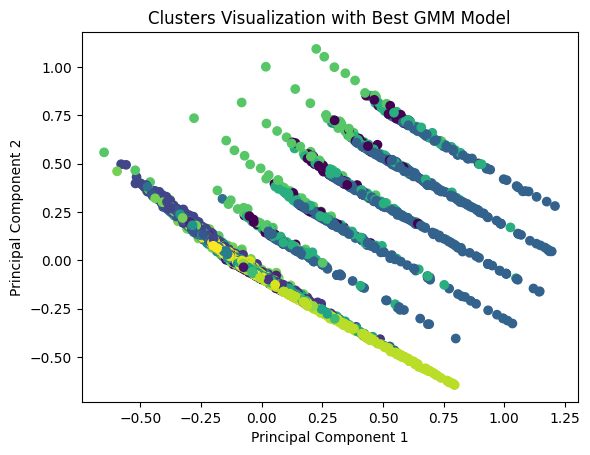

Best BIC: -525987.0125482096
Best number of components: None
Best covariance type: None
Best init params: None
Best max iterations: None


In [42]:
# visualize the clusters
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=gmm_clusters, cmap='viridis')  # Use gmm_clusters
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization with Best GMM Model')
plt.show()

# print the best model parameters
print(f'Best BIC: {best_bic}')
print(f'Best number of components: {best_n_components}')
print(f'Best covariance type: {best_covariance_type}')
print(f'Best init params: {best_init_params}')
print(f'Best max iterations: {best_max_iter}')

In [44]:
# add cluster labels to the DataFrame
df_cluster['Cluster'] = gmm_clusters

# analyze cluster characteristics
cluster_summary = df_cluster.groupby('Cluster')[model_features].mean()
print(cluster_summary)

# add the target variable back to the DataFrame for analysis
df_cluster[model_target] = df_clean[model_target]

# link clusters to hypothesis by checking purchase rates
purchase_rate = df_cluster.groupby('Cluster')[model_target].mean()
print(purchase_rate)

         Administrative  Administrative_Duration  Informational  \
Cluster                                                           
0              0.121767                 0.025792       0.027094   
1              0.000000                 0.000000       0.000000   
2              0.141241                 0.040870       0.186216   
3              0.177381                 0.137358       0.102512   
4              0.321797                 0.114437       0.229176   
5              0.358553                 0.348786       0.156284   
6              0.000000                 0.000000       0.000000   
7              0.611111                 0.211304       0.130952   
8              0.205749                 0.067155       0.000000   
9              0.153427                 0.058629       0.000000   
10             0.281184                 0.101070       0.101228   
11             0.101244                 0.027362       0.000000   
12             0.092480                 0.023767       0.02787

#### 3.2.2. Model 2: Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
Advantages:
- Can handle outliers effectively by treating them as noise.
- Does not require specifying the number of clusters in advance.
- Can find arbitrarily shaped clusters.

In [45]:
from joblib import Parallel, delayed
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

def fit_dbscan(eps, min_samples, pca_features):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(pca_features)

    # Skip if all points are noise
    if len(np.unique(clusters)) <= 1:
        return -1, None  # Return -1 for invalid score

    try:
        score = silhouette_score(pca_features, clusters)
        return score, dbscan
    except:
        return -1, None  # Return -1 in case of error

best_silhouette = -1
best_eps = None
best_min_samples = None
best_dbscan = None

# Define parameter ranges
eps_range = np.arange(0.1, 1.1, 0.1)
min_samples_range = range(5, 21, 5)

# Create the parameter grid
param_grid = [(eps, min_samples) for eps in eps_range for min_samples in min_samples_range]

# Use parallel processing for the grid search
results = Parallel(n_jobs=-1)(
    delayed(fit_dbscan)(eps, min_samples, pca_features) for eps, min_samples in param_grid
)

# Process results to find the best model based on silhouette score
for score, dbscan in results:
    if score > best_silhouette:
        best_silhouette = score
        best_dbscan = dbscan
        best_eps = dbscan.eps
        best_min_samples = dbscan.min_samples

# Train final model with best parameters
final_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_clusters = final_dbscan.fit_predict(pca_features)

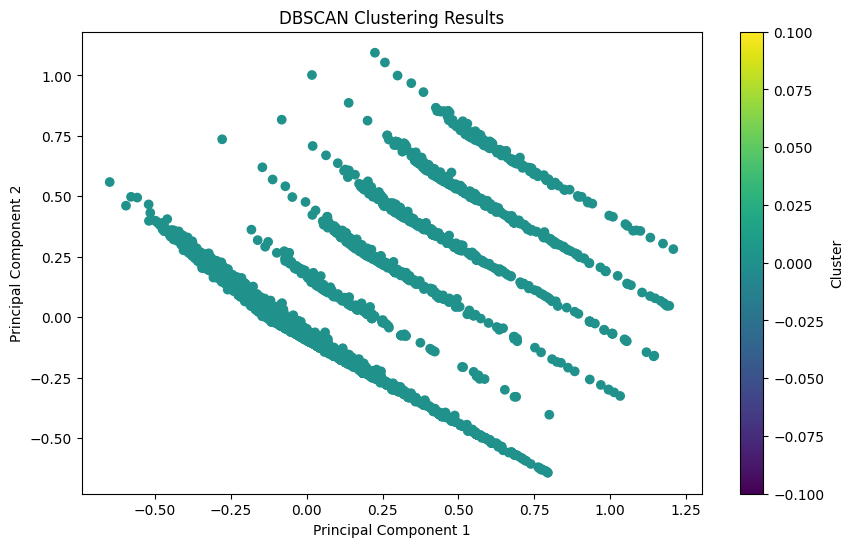

Best eps: 0.5
Best min_samples: 20
Best silhouette score: 0.682121373050006
Number of clusters found: 1
Number of noise points: 6


In [46]:
# visualize results
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

# print best parameters for DBSCAN model
print(f'Best eps: {best_eps}')
print(f'Best min_samples: {best_min_samples}')
print(f'Best silhouette score: {best_silhouette}')
print(f'Number of clusters found: {len(np.unique(dbscan_clusters[dbscan_clusters != -1]))}')  # Use dbscan_clusters
print(f'Number of noise points: {len(dbscan_clusters[dbscan_clusters == -1])}')  # Use dbscan_clusters

#### 3.2.3. Result comparison

In [48]:
# remove noise from DBSCAN results for evaluation
filtered_dbscan_clusters = dbscan_clusters[dbscan_clusters != -1]
filtered_dbscan_features = pca_features[dbscan_clusters != -1]

# DBSCAN Metrics
if len(np.unique(filtered_dbscan_clusters)) > 1:
    dbscan_silhouette = silhouette_score(filtered_dbscan_features, filtered_dbscan_clusters)
    dbscan_dbi = davies_bouldin_score(filtered_dbscan_features, filtered_dbscan_clusters)
else:
    dbscan_silhouette = None
    dbscan_dbi = None
dbscan_noise_percentage = np.sum(dbscan_clusters == -1) / len(dbscan_clusters)

# GMM Metrics
if len(np.unique(gmm_clusters)) > 1:
    gmm_silhouette = silhouette_score(pca_features, gmm_clusters)
    gmm_dbi = davies_bouldin_score(pca_features, gmm_clusters)
else:
    gmm_silhouette = None
    gmm_dbi = None

# add target variable to compare purity
df_cluster[model_target] = df_clean[model_target]

# purity function
def purity_score(true_labels, predicted_clusters):
    contingency_matrix = pd.crosstab(predicted_clusters, true_labels)
    return np.sum(np.amax(contingency_matrix.values, axis=1)) / len(true_labels)

# purity for DBSCAN (excluding noise)
dbscan_purity = purity_score(df_cluster[model_target][dbscan_clusters != -1], filtered_dbscan_clusters)

# purity for GMM
gmm_purity = purity_score(df_cluster[model_target], gmm_clusters)

# output results
print("DBSCAN Metrics:")
if dbscan_silhouette is not None:
    print(f" - Silhouette Score: {dbscan_silhouette}")
    print(f" - Davies-Bouldin Index: {dbscan_dbi}")
else:
    print(" - Silhouette Score: Not applicable (only one cluster)")
    print(" - Davies-Bouldin Index: Not applicable (only one cluster)")
print(f" - Noise Percentage: {dbscan_noise_percentage:.2%}")
print(f" - Purity Score: {dbscan_purity}")

print("\nGMM Metrics:")
if gmm_silhouette is not None:
    print(f" - Silhouette Score: {gmm_silhouette}")
    print(f" - Davies-Bouldin Index: {gmm_dbi}")
else:
    print(" - Silhouette Score: Not applicable (only one cluster)")
    print(" - Davies-Bouldin Index: Not applicable (only one cluster)")
print(f" - Purity Score: {gmm_purity}")

DBSCAN Metrics:
 - Silhouette Score: Not applicable (only one cluster)
 - Davies-Bouldin Index: Not applicable (only one cluster)
 - Noise Percentage: 0.05%
 - Purity Score: 0.8366888447247904

GMM Metrics:
 - Silhouette Score: -0.039315087009000334
 - Davies-Bouldin Index: 2.9136185227361002
 - Purity Score: 0.8760687451420676


### 3.3. Classification

### 2.2. Analysis and Hypothesis Proposal
#### 2.2.1. Regression problem
 
#### 2.2.2. Clustering problem
 
#### 2.2.3. Classification problem
##### 1. Visitor Engagement
- **Observation**: Scatterplots of `Administrative_Duration`, `Informational_Duration`, and `ProductRelated_Duration` against `Revenue` often show higher densities of sessions with greater durations linked to purchases (`Revenue = True`).
  - `PageValues` seems to have a strong positive correlation with `Revenue`. Higher page values indicate a higher likelihood of purchases, aligning with the hypothesis.

- **Hypothesis**: Higher engagement leads to higher purchase probabilities.
  - Higher values for `Administrative_Duration`, `Informational_Duration`, and `ProductRelated_Duration` might indicate greater visitor interest, resulting in purchases.
  - A higher `PageValues` score is likely to correlate positively with purchases.

##### 2. Bounce and Exit Rates
- **Observation**: From scatterplots of `BounceRates` and `ExitRates` against `Revenue`, sessions with higher bounce rates (`BounceRates`) and exit rates (`ExitRates`) generally correspond to no purchases (`Revenue = False`), which supports the hypothesis of poor user experience reducing purchase likelihood.

- **Hypothesis**: Poor user experience decreases purchase likelihood.
  - Higher `BounceRates` and `ExitRates` might indicate user dissatisfaction, leading to fewer purchases.

##### 3. Time Factors
- **Observation**: Visualizations of `SpecialDay` against `Revenue` show an increase in purchases as the proximity to a special day increases. Similarly, analysis of `Month` against `Revenue` highlights seasonal trends, with months like November showing higher purchase probabilities, likely due to shopping holidays like Black Friday.

- **Hypothesis**: Shopping behavior depends on timing.
  - Visits closer to a `SpecialDay` (e.g., Black Friday or holidays) might have a higher likelihood of purchases.
  - Certain months (`Month`) might reflect seasonal shopping trends, influencing purchase behavior.

##### 4. User Types
- **Observation**: From categorical plots of `VisitorType` and `Revenue`, returning visitors have a noticeably higher likelihood of generating revenue compared to new visitors. This observation supports the hypothesis that returning visitors are more likely to purchase.

- **Hypothesis**: Returning visitors are more likely to purchase.
  - Returning visitors (`VisitorType = Returning_Visitor`) might have a higher likelihood of making a purchase compared to new visitors (`VisitorType = New_Visitor`).

##### 5. Technical Features
- **Observation**: Bar charts and heatmaps for `OperatingSystems`, `Browser`, and `TrafficType` reveal varying purchase probabilities across categories. For instance, some browsers or traffic sources have a stronger association with purchases, supporting the hypothesis that technical accessibility impacts purchases.

- **Hypothesis**: Technical accessibility impacts purchases.
  - Different `OperatingSystems`, `Browser`, and `TrafficType` values might influence the likelihood of purchases based on usability or accessibility.

##### 6. Weekend Influence
- **Observation**: A categorical plot of `Weekend` against `Revenue` shows slight differences in purchase likelihood between weekend and weekday sessions. This observation suggests some behavioral differences in shopping patterns based on the day of the week.
- **Hypothesis**: Shopping behavior differs on weekends.
  - Visits during weekends (`Weekend = True`) might have different purchase rates compared to weekday visits.

---

In [139]:
X = df_clean.drop(columns=['Revenue'])
Y = df_clean['Revenue'].astype(int)

### Check the data imbalancing

In [140]:
value_counts = Y.value_counts()
print(value_counts)

Revenue
0    9689
1    1890
Name: count, dtype: int64


### Oversample the imbalance data


In [141]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier

In [142]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ros = RandomOverSampler()
X_KNN, Y_KNN = ros.fit_resample(X, Y) # take more from the less class to increase its size

In [143]:
value_counts = Y_KNN.value_counts()
print(value_counts)

Revenue
0    9689
1    9689
Name: count, dtype: int64


## Spliting the data

In [144]:
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [145]:
# Assuming X_KNN and Y_KNN are already defined
x_train_origin, x_test_origin, y_train_origin, y_test_origin = train_test_split(X_KNN, Y_KNN, test_size=0.2, random_state=0)

In [146]:
# Permutation Importance for KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_origin, y_train_origin)

KNeighborsClassifier()

In [147]:
# Compute permutation importance
perm_importance = permutation_importance(knn, x_test_origin, y_test_origin, n_repeats=10, random_state=42)

In [148]:
# Get feature importance scores
perm_importance_df = pd.DataFrame({
    'Feature': X_KNN.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

In [149]:
# Save or print the results
print(perm_importance_df)  # To print the importance scores
perm_importance_df.to_csv('permutation_importance.csv', index=False)  # Save as CSV file

                    Feature    Importance
8                PageValues  1.829205e-01
5   ProductRelated_Duration  1.756450e-01
1   Administrative_Duration  1.115583e-01
3    Informational_Duration  5.748194e-02
4            ProductRelated  5.025800e-02
10                    Month  6.862745e-03
14              TrafficType  3.482972e-03
13                   Region  1.135191e-03
12                  Browser  7.481940e-04
15              VisitorType  2.579979e-05
11         OperatingSystems  1.110223e-17
9                SpecialDay  0.000000e+00
6               BounceRates  0.000000e+00
7                 ExitRates  0.000000e+00
2             Informational -2.579979e-05
16                  Weekend -1.805986e-04
0            Administrative -5.159959e-04


# Select features to feed

In [150]:
selected_features = [
    "PageValues",
    "ProductRelated_Duration",
    "Administrative_Duration",
    "Informational_Duration",
    "ProductRelated"
]

In [151]:
# Creating a new dataset with the selected features
X_KNN_selected = X_KNN[selected_features]

In [152]:
# Assuming X_KNN and Y_KNN are already defined
x_train, x_test, y_train, y_test = train_test_split(X_KNN_selected, Y_KNN, test_size=0.2, random_state=0)

In [153]:
# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [154]:
param_dist = {
    'n_neighbors': randint(3, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [155]:
# Initialize the KNN classifier
knn = KNeighborsClassifier()

In [156]:
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/minh/git_proj/myenv/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/minh/git_proj/myenv/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/minh/git_proj/myenv/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.6.0

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d2d21712e40>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy', verbose=1)

In [157]:
# Get the best parameters and best estimator
best_params = random_search.best_params_
best_knn = random_search.best_estimator_

In [158]:
# Evaluate the best model
y_pred = best_knn.predict(x_test)

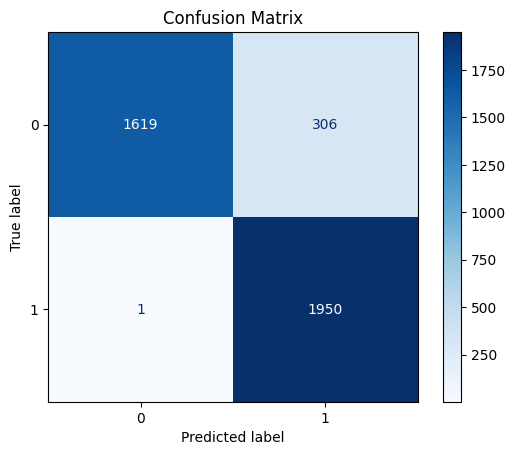

In [159]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [160]:
# Print the best parameters and evaluation metrics
print("Best Parameters:", best_params)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Confusion Matrix:
[[1619  306]
 [   1 1950]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1925
           1       0.86      1.00      0.93      1951

    accuracy                           0.92      3876
   macro avg       0.93      0.92      0.92      3876
weighted avg       0.93      0.92      0.92      3876


Accuracy: 0.9207946336429309


In [161]:
X = df_clean[selected_features]   
y = df_clean['Revenue'].astype(int)

In [162]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [163]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [164]:
# Setting up the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [165]:
# Create a RandomForestClassifier with GridSearchCV
clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc', verbose=2)
clf.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_sam

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=2)

In [166]:
# Display the best parameters
print("Best Parameters Found:\n", clf.best_params_)

Best Parameters Found:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [167]:
# Predict probabilities
y_pred = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)[:, 1]

In [168]:
# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      2899
           1       0.53      0.75      0.62       575

    accuracy                           0.85      3474
   macro avg       0.74      0.81      0.77      3474
weighted avg       0.88      0.85      0.86      3474



In [169]:
from sklearn.metrics import roc_curve, auc

In [170]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

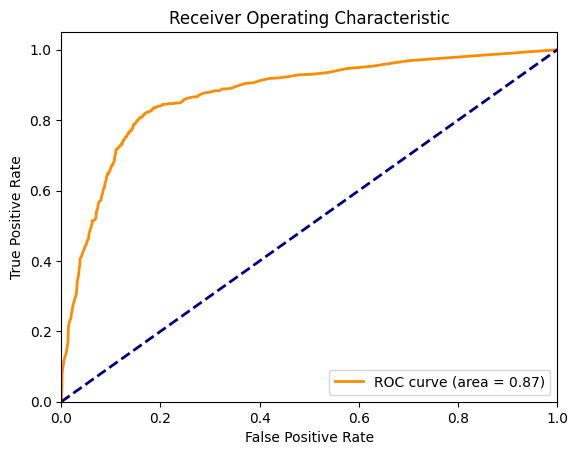

In [171]:
# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## XGBOOST

In [172]:
file_path = 'online_shoppers_intention.csv'
bach_df = df_clean.copy()

In [173]:
bach_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11579 entries, 1 to 12303
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11579 non-null  int64  
 1   Administrative_Duration  11579 non-null  float64
 2   Informational            11579 non-null  int64  
 3   Informational_Duration   11579 non-null  float64
 4   ProductRelated           11579 non-null  int64  
 5   ProductRelated_Duration  11579 non-null  float64
 6   BounceRates              11579 non-null  float64
 7   ExitRates                11579 non-null  float64
 8   PageValues               11579 non-null  float64
 9   SpecialDay               11579 non-null  float64
 10  Month                    11579 non-null  int64  
 11  OperatingSystems         11579 non-null  int64  
 12  Browser                  11579 non-null  int64  
 13  Region                   11579 non-null  int64  
 14  TrafficType              11

In [174]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score

In [175]:
class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.1):
        self.threshold = threshold
        self.columns_to_drop_ = []

    def fit(self, X, y):
        numeric_columns = X.select_dtypes(include='number').columns
        df_with_target = pd.concat([X, y.rename('target')], axis=1)
        corr_matrix = df_with_target.corr()

        self.columns_to_drop_ = [
            col for col in numeric_columns
            if abs(corr_matrix['target'][col]) < self.threshold
        ]
        return self

    def transform(self, X):
        return X.drop(columns=self.columns_to_drop_, errors='ignore')

In [176]:
from sklearn.preprocessing import RobustScaler

In [177]:
class MyRobustScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = RobustScaler()
        self.numeric_features = None

    def fit(self, X, y=None):
        self.numeric_features = X.select_dtypes(include='number').columns.tolist()
        self.scaler.fit(X[self.numeric_features])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.numeric_features] = self.scaler.transform(X[self.numeric_features])
        return X

In [178]:
class MyLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = {}

    def fit(self, X, y=None):
        # Identify object (categorical) columns
        self.categorical_columns = X.select_dtypes(include=['object']).columns
        # Fit LabelEncoders for each categorical column
        for col in self.categorical_columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self

    def transform(self, X):
        X = X.copy()
        # Transform categorical columns using the fitted encoders
        for col, encoder in self.encoders.items():
            X[col] = encoder.transform(X[col])
        return X

In [179]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [180]:
# Define pipeline
pipeline = Pipeline([
    ('correlation_filter', CorrelationFilter(threshold=0.1)),
    ('label_encode', MyLabelEncoder()),
    ('robust_scaling', MyRobustScaler()),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

In [181]:
X = bach_df.drop(columns=['Revenue'])
Y = bach_df['Revenue'].astype(int)

In [182]:
value_counts = Y.value_counts()
print(value_counts)

Revenue
0    9689
1    1890
Name: count, dtype: int64


In [183]:
ros = RandomOverSampler()
X, Y = ros.fit_resample(X, Y)

In [184]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [185]:
param_grid = {
    'xgboost__n_estimators': [50, 100, 150],
    'xgboost__max_depth': [3, 5, 7],
    'xgboost__learning_rate': [0.01, 0.1, 0.2]
}

In [186]:
# GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END xgboost__learning_rate=0.01, xgboost__max_depth=3, xgboost__n_estimators=50; total time=   0.1s
[CV] END xgboost__learning_rate=0.01, xgboost__max_depth=3, xgboost__n_estimators=50; total time=   0.1s
[CV] END xgboost__learning_rate=0.01, xgboost__max_depth=3, xgboost__n_estimators=50; total time=   0.1s
[CV] END xgboost__learning_rate=0.01, xgboost__max_depth=3, xgboost__n_estimators=100; total time=   0.1s
[CV] END xgboost__learning_rate=0.01, xgboost__max_depth=3, xgboost__n_estimators=100; total time=   0.4s
[CV] END xgboost__learning_rate=0.01, xgboost__max_depth=3, xgboost__n_estimators=100; total time=   0.1s
[CV] END xgboost__learning_rate=0.01, xgboost__max_depth=3, xgboost__n_estimators=150; total time=   0.1s
[CV] END xgboost__learning_rate=0.01, xgboost__max_depth=3, xgboost__n_estimators=150; total time=   0.6s
[CV] END xgboost__learning_rate=0.01, xgboost__max_depth=3, xgboost__n_estimators=150; total t

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('correlation_filter',
                                        CorrelationFilter()),
                                       ('label_encode', MyLabelEncoder()),
                                       ('robust_scaling', MyRobustScaler()),
                                       ('xgboost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgboost__learning_rate': [0.01, 0.1, 0.2],
                         'xgboost__max_depth': [3, 5, 7],
                         'xgboost__n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [187]:
# Get the best parameters and evaluate the model
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy:.4f}")